# 1. Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [9]:
#卷積層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [11]:
model.add(Dropout(rate=0.25))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#卷積層2與池化層2

In [14]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
#Step3	建立神經網路(平坦層、隱藏層、輸出層)

In [18]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(10, activation='softmax'))

In [21]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [22]:
try:
    model.load_weights("SaveModel/CifarModelCnn_v1.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型成功!繼續訓練模型


# 訓練模型

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [24]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 208s - loss: 0.3653 - acc: 0.8719 - val_loss: 0.7505 - val_acc: 0.7444
Epoch 2/10
40000/40000 [==============================] - 209s - loss: 0.2928 - acc: 0.8987 - val_loss: 0.7510 - val_acc: 0.7501
Epoch 3/10
40000/40000 [==============================] - 210s - loss: 0.2496 - acc: 0.9121 - val_loss: 0.7500 - val_acc: 0.7521
Epoch 4/10
40000/40000 [==============================] - 208s - loss: 0.2052 - acc: 0.9293 - val_loss: 0.7652 - val_acc: 0.7501
Epoch 5/10
40000/40000 [==============================] - 216s - loss: 0.1857 - acc: 0.9363 - val_loss: 0.7738 - val_acc: 0.7520
Epoch 6/10
40000/40000 [==============================] - 215s - loss: 0.1602 - acc: 0.9441 - val_loss: 0.8258 - val_acc: 0.7398
Epoch 7/10
40000/40000 [==============================] - 214s - loss: 0.1397 - acc: 0.9532 - val_loss: 0.8160 - val_acc: 0.7490
Epoch 8/10
40000/40000 [=======================

In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

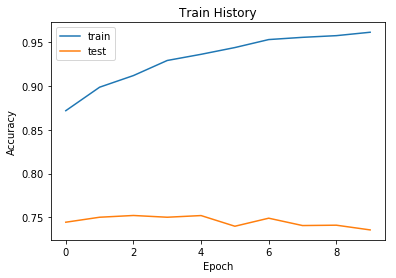

In [26]:
show_train_history('acc','val_acc')

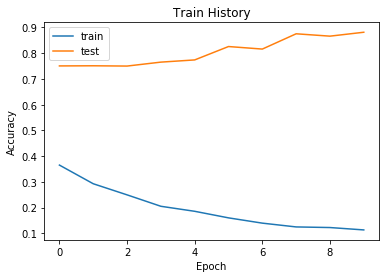

In [27]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [28]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.72919999999999996

# 進行預測

In [29]:
prediction=model.predict_classes(x_img_test_normalize)

10000/10000 [==============================] - 13s    


In [30]:
prediction[:10]

array([5, 8, 8, 8, 6, 6, 1, 6, 3, 1], dtype=int64)

# 查看預測結果

In [31]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [32]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

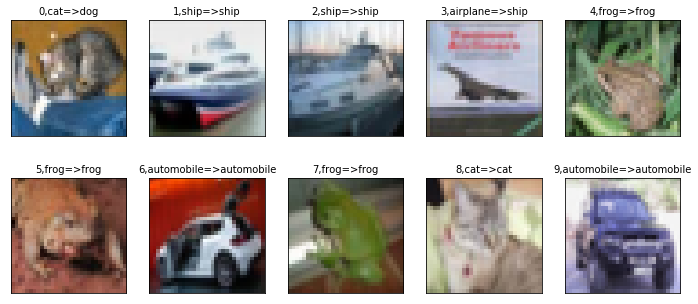

In [33]:
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

# 查看預測機率

In [34]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [35]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: dog


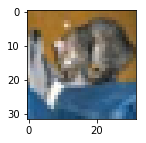

airplane Probability:0.011492377
automobile Probability:0.001370332
bird Probability:0.004454124
cat Probability:0.444378585
deer Probability:0.002993586
dog Probability:0.500980794
frog Probability:0.011197765
horse Probability:0.009764786
ship Probability:0.013199866
truck Probability:0.000167900


In [36]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,0)

label: airplane predict: ship


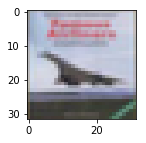

airplane Probability:0.330879122
automobile Probability:0.000470018
bird Probability:0.035518814
cat Probability:0.000189674
deer Probability:0.003922747
dog Probability:0.000002377
frog Probability:0.000001298
horse Probability:0.000009037
ship Probability:0.628820658
truck Probability:0.000186170


In [37]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,3)

# confusion matrix

In [38]:
prediction.shape

(10000,)

In [39]:
y_label_test.shape

(10000, 1)

In [40]:
y_label_test

array([[3],
       [8],
       [8],
       ..., 
       [5],
       [1],
       [7]])

In [41]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [42]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,787,14,86,11,21,3,10,13,35,20
1,18,844,19,7,6,6,14,5,17,64
2,48,4,697,31,84,35,68,20,7,6
3,18,9,138,484,81,123,93,40,8,6
4,19,1,94,42,711,11,66,48,5,3
5,12,4,110,147,68,561,40,47,7,4
6,3,7,53,30,20,11,868,4,2,2
7,10,0,54,25,71,37,11,785,4,3
8,61,40,32,13,14,6,12,3,796,23


In [43]:
print(label_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


# Save model to JSON

In [44]:
model_json = model.to_json()
with open("SaveModel/CifarModelCnn_v1.json", "w") as json_file:
    json_file.write(model_json)

# Save Model to YAML

In [45]:
model_yaml = model.to_yaml()
with open("SaveModel/CifarModelCnn_v1.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)


# Save Weight to h5 

In [46]:
model.save_weights("SaveModel/CifarModelCnn_v1.h5")
print("Saved model to disk")

Saved model to disk


In [47]:
for layer in model.layers:
    lay_config = layer.get_config()
    lay_weights = layer.get_weights()
    print('*** layer config ***')
    print(lay_config)
    print('*** layer weights ***')
    print(lay_weights)

*** layer config ***
{'name': 'conv2d_1', 'trainable': True, 'batch_input_shape': (None, 32, 32, 3), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
*** layer weights ***
[array([[[[  9.85099226e-02,  -6.99044690e-02,  -5.51237464e-02,
            1.60409302e-01,   1.23677872e-01,   1.65092602e-01,
           -1.44993231e-01,   2.20716819e-02,  -2.39820164e-02,
            1.23895146e-02,  -8.04824755e-02,  -1.75741017e-02,
            6.87158853e-02,   1.83539346e-01,  -1.03358775e-02,
           -1.99602768e-0

In [48]:
layer = model.layers[0]
lay_config = layer.get_config()
lay_weights = layer.get_weights()
print('*** cifar-10 layer config ***')
print(lay_config)
print('*** cifar-10 layer weights ***')
print(lay_weights)

*** cifar-10 layer config ***
{'name': 'conv2d_1', 'trainable': True, 'batch_input_shape': (None, 32, 32, 3), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
*** cifar-10 layer weights ***
[array([[[[  9.85099226e-02,  -6.99044690e-02,  -5.51237464e-02,
            1.60409302e-01,   1.23677872e-01,   1.65092602e-01,
           -1.44993231e-01,   2.20716819e-02,  -2.39820164e-02,
            1.23895146e-02,  -8.04824755e-02,  -1.75741017e-02,
            6.87158853e-02,   1.83539346e-01,  -1.03358775e-02,
       

In [49]:
layer = model.layers[3]
lay_config = layer.get_config()
lay_weights = layer.get_weights()
print('*** cifar-10 layer-2 config ***')
print(lay_config)
print('*** cifar-10 layer-2 weights ***')
print(lay_weights)

*** cifar-10 layer-2 config ***
{'name': 'conv2d_2', 'trainable': True, 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
*** cifar-10 layer-2 weights ***
[array([[[[ -1.26144856e-01,  -1.19460844e-01,   9.27611366e-02, ...,
            2.57716551e-02,   1.97205059e-02,  -7.62775242e-02],
         [  1.43398628e-01,   4.19352978e-01,   3.41171846e-02, ...,
            4.88264039e-02,   7.57556483e-02,   3.77730839e-02],
         [  9.43607613e-02,  -1.24260046e-01,  -1.17046207e-01, ...,
            4.44184877e-02,   1.71504412e-02, 

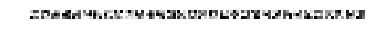

In [ ]:
layidx = 0
params_list = model.layers[0].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]

images = weights_array.reshape(3, 32, 3, 3)

plotpos = 1
for idx in range(32):
    plt.subplot(1, 32, plotpos)
    plt.imshow(images[0][idx])
    plt.gray()
    plt.axis('off')
    plotpos += 1
plt.show()

In [ ]:
layidx = 3
params_list = model.layers[layidx].get_weights()
weights_array = params_list[0]

images = weights_array.reshape(32, 64, 3, 3)

plotpos = 1
for idx1 in range(32):
    for idx2 in range(64):
        # 画像データのイメージを表示
        plt.subplot(32, 64, plotpos)
        plt.imshow(images[idx1][idx2])
        plt.gray()
        plt.axis('off')
        plotpos += 1
plt.show()

In [ ]:
layidx = 8
params_list = model.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]

image = weights_array.reshape(1024, 4096)

plt.imshow(image)
plt.gray()
plt.axis('off')
plt.show()

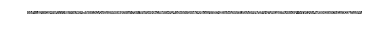

In [72]:
layidx = 10
params_list = model.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]

image = weights_array.reshape(10, 1024)

plt.imshow(image)
plt.gray()
plt.axis('off')
plt.show()

In [75]:
import codecs, json

print("output weights as JSON")

filename = "SaveModel/CifarModelCnnParamsCnn_v1_layer%02d.json"

layidx = 0
params_list = model.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)

layidx = 3
params_list = model.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)

layidx = 8
params_list = model.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)

layidx = 10
params_list = model.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)

print("done")

output weights as JSON
done


In [83]:
#from keras.models import load_model

#model2 = load_model('./SaveModel/cifarCnnModelnew.h5')

# 再学習
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=100, batch_size=128, verbose=1) 


Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 190s - loss: 0.3472 - acc: 0.8772 - val_loss: 0.7173 - val_acc: 0.7572
Epoch 2/100
40000/40000 [==============================] - 191s - loss: 0.3056 - acc: 0.8928 - val_loss: 0.7409 - val_acc: 0.7510
Epoch 3/100
40000/40000 [==============================] - 207s - loss: 0.2756 - acc: 0.9043 - val_loss: 0.7407 - val_acc: 0.7530
Epoch 4/100
40000/40000 [==============================] - 201s - loss: 0.2427 - acc: 0.9148 - val_loss: 0.7463 - val_acc: 0.7544
Epoch 5/100
40000/40000 [==============================] - 188s - loss: 0.2246 - acc: 0.9212 - val_loss: 0.7504 - val_acc: 0.7518
Epoch 6/100
40000/40000 [==============================] - 188s - loss: 0.2064 - acc: 0.9284 - val_loss: 0.7787 - val_acc: 0.7476
Epoch 7/100
40000/40000 [==============================] - 190s - loss: 0.1842 - acc: 0.9359 - val_loss: 0.7720 - val_acc: 0.7545
Epoch 8/100
40000/40000 [===============

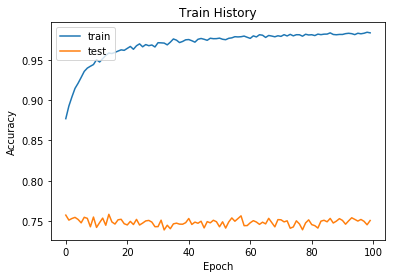

In [89]:
show_train_history('acc','val_acc')

In [90]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.74639999999999995

In [91]:
Predicted_Probability=model.predict(x_img_test_normalize)

label: deer predict: deer


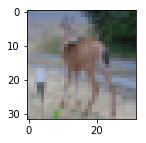

airplane Probability:0.000002931
automobile Probability:0.000000000
bird Probability:0.005548959
cat Probability:0.000949489
deer Probability:0.908401668
dog Probability:0.082495496
frog Probability:0.001591761
horse Probability:0.001001991
ship Probability:0.000007642
truck Probability:0.000000012


In [92]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,100)

In [93]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,787,13,50,18,19,7,17,8,44,37
1,19,860,6,8,6,7,14,2,13,65
2,51,4,643,46,95,47,76,16,11,11
3,21,9,74,514,72,169,83,32,8,18
4,20,2,72,50,715,28,59,41,10,3
5,6,2,53,155,48,649,42,30,6,9
6,4,7,44,34,28,19,856,1,5,2
7,14,2,26,29,57,66,14,781,1,10
8,42,35,21,11,7,8,15,5,832,24


In [94]:
model_json = model.to_json()
with open("SaveModel/CifarModelCnn_v2.json", "w") as json_file:
    json_file.write(model_json)

model_yaml = model.to_yaml()
with open("SaveModel/CifarModelCnn_v2.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

model.save_weights("SaveModel/CifarModelCnn_v2.h5")
print("Saved model to disk")

Saved model to disk


In [95]:
for layer in model.layers:
    lay_config = layer.get_config()
    lay_weights = layer.get_weights()
    print('*** layer config ***')
    print(lay_config)
    print('*** layer weights ***')
    print(lay_weights)

*** layer config ***
{'name': 'conv2d_1', 'trainable': True, 'batch_input_shape': (None, 32, 32, 3), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
*** layer weights ***
[array([[[[  1.26007006e-01,  -8.95008892e-02,  -3.92115861e-02,
            2.32214630e-01,   1.66509435e-01,   2.34686941e-01,
           -1.64691791e-01,  -1.90395229e-02,   5.47954664e-02,
            1.53007475e-03,  -5.66042494e-03,  -6.23382162e-03,
            2.76903324e-02,   2.01103568e-01,   3.24269310e-02,
            3.17546364e-0

In [96]:
import codecs, json
print("output weights as JSON")
filename = "SaveModel/CifarModelCnnParamsCnn_v2_layer%02d.json"

layidx = 0
params_list = model.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)
layidx = 3
params_list = model.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)
layidx = 8
params_list = model.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)
layidx = 10
params_list = model.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)
print("done")

output weights as JSON
done


In [97]:
x_img_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ..., 
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ..., 
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ..., 
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ..., 
       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ..., 
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ..., 
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ..., 
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,

In [98]:
x_img_train_normalize_test = x_img_train[0].astype('float32') / 255.0

In [100]:
x_img_train_normalize_test.shape

(32, 32, 3)

In [107]:
layidx = 0
params_list = model.layers[layidx].get_weights()
weights_array = params_list[0]
weights_array[0].shape

(3, 3, 32)

In [108]:
weights_array[0][0].shape

(3, 32)

In [109]:
weights_array[0][0][0].shape

(32,)

In [115]:
layidx = 0
params_list = model.layers[layidx].get_weights()
lay_config = model.layers[layidx].get_config()

weights_array = params_list[0]
biases_array = params_list[1]


In [116]:
print(weights_array)

[[[[  1.26007006e-01  -8.95008892e-02  -3.92115861e-02   2.32214630e-01
      1.66509435e-01   2.34686941e-01  -1.64691791e-01  -1.90395229e-02
      5.47954664e-02   1.53007475e-03  -5.66042494e-03  -6.23382162e-03
      2.76903324e-02   2.01103568e-01   3.24269310e-02   3.17546364e-05
      1.43263787e-01   2.07375109e-01   3.33710581e-01   2.86539085e-02
      1.53732449e-01  -1.21717085e-03  -1.09775588e-01  -4.12088260e-02
      6.12535188e-03   8.00489634e-02   1.31910846e-01   3.35768700e-01
     -2.42042281e-02  -2.11791039e-01  -1.26590133e-01  -1.88910916e-01]
   [  4.43792902e-02   2.02522632e-02  -6.07074983e-02  -9.67312902e-02
      2.12020308e-01   6.95834011e-02  -6.08217344e-02  -1.11877173e-01
     -1.36991471e-01  -1.09312944e-01  -1.55035600e-01   1.25695392e-01
     -1.12895302e-01  -6.38056360e-03   1.76967606e-01  -7.13592544e-02
      8.82468820e-02   4.64953370e-02  -1.28310800e-01   1.23385750e-01
      1.60501584e-01   7.01602101e-02  -5.93764260e-02   2.7854

In [114]:
weights_array.shape

(3, 3, 3, 32)

In [117]:
print(lay_config)

{'name': 'conv2d_1', 'trainable': True, 'batch_input_shape': (None, 32, 32, 3), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


In [118]:
layidx = 3
params_list = model.layers[layidx].get_weights()
lay_config = model.layers[layidx].get_config()

weights_array = params_list[0]
biases_array = params_list[1]

In [119]:
weights_array.shape

(3, 3, 32, 64)